### **Ryogo Katahira**

# Homework 4 - Part 3

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1) Below is a simple function called `balmer` that (as its name suggests) uses the Balmer formula to return the wavelengths of a series of hydrogen lines. Annotate each line of the function with a comment that describes what it is doing. What units does `balmer` return?

In [13]:
def balmer():

    # Rydberg Constant for Hydrogen in nm^-1
    R = 1./91.17636 # hint: look up the Rydberg wavelength!

    # Array of possible states, 3≤n<10.
    n = np.arange(3,10,1)

    # calculatng (1/2)^2
    level2 = (1./2.)**2
    # calculatiing (1/n)^2
    leveln = (1./n)**2

    # Balmer's formula: 1/lambda = R * ((1/2)^2 + (1/n)^2)
    invlam = R*(level2 - leveln)
    # 1/(1/lambda) = la,bda
    lam = 1./invlam

    # return lambdas in nm (as a list)
    return(lam)

(2) The `balmer` function returns an array with a list of wavelengths. You can assign them to a Python object (`lam` in the cell below) and then make a plot. We're going to be a bit clever here and use the matplotlib histogram function `plt.hist`. Execute the cell below and then play around with the second number in the `plt.hist` call until you understand what it is doing.   
  a) What does the second number in the hist call do? Are all of the wavelengths in the printed list plotted? If not, can you change anything about the plot to make them all visible?   

  *It is the number of the bins of the histogram. It was initially set to 200, which means that the wavelength in x-axis was divided into 200 small intervals, and the histogram was countint how many samples there were in each bin.* \\
  *Currently, not all wavelength (bins) have a balmer line. However, by increasing the maximum principle quantum number of electron that we consider, there would be more possible electraon transition combinations, which would produce more Balmer lines.*

  b) add a title and axis labels to the plot    

[656.469792   486.27392    434.17314286 410.29362    397.12370133
 389.019136   383.65117714]


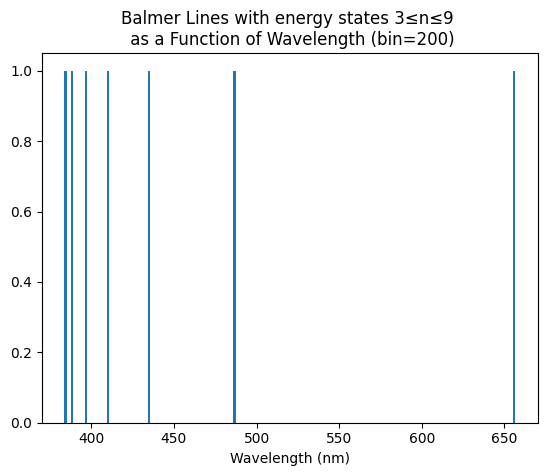

In [14]:
lam = balmer()
print(lam)
plt.hist(lam,200)
plt.title("Balmer Lines with energy states 3≤n≤9 \n as a Function of Wavelength (bin=200)")
plt.xlabel('Wavelength (nm)')
plt.show()

(3) Copy the `balmer` function to a new cell below and then modify it to show more lines/transitions. Increase the number of lines until it is no longer productive to do so, and explain why this is the case using one or more plots that you generate to support your argument. On which side of the spectrum do you reach the limit? Why does this make sense relative to the spacing of energy levels in the hydrogen atom?

In [15]:
# your modified balmer function goes
def balmer_mod(n_max=15):

    # Rydberg Constant for Hydrogen in nm^-1
    R = 1./91.17636 # hint: look up the Rydberg wavelength!

    # Array of possible states
    n = np.arange(3,int(n_max),1)

    # calculatng (1/2)^2
    level2 = (1./2.)**2
    # calculatiing (1/n)^2
    leveln = (1./n)**2

    # Balmer's formula: 1/lambda = R * ((1/2)^2 + (1/n)^2)
    invlam = R*(level2 - leveln)
    # 1/(1/lambda) = la,bda
    lam = 1./invlam

    # return lambdas in nm (as a list)
    return(lam)

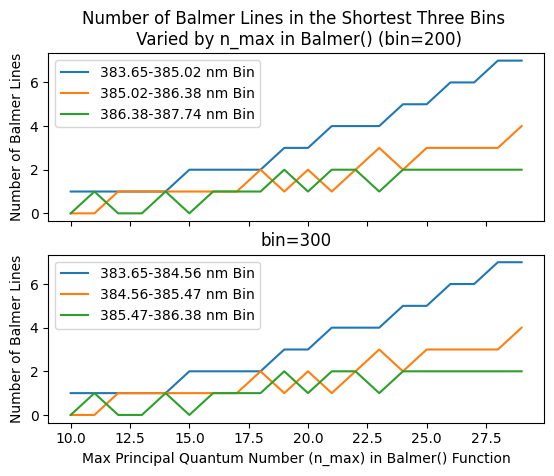

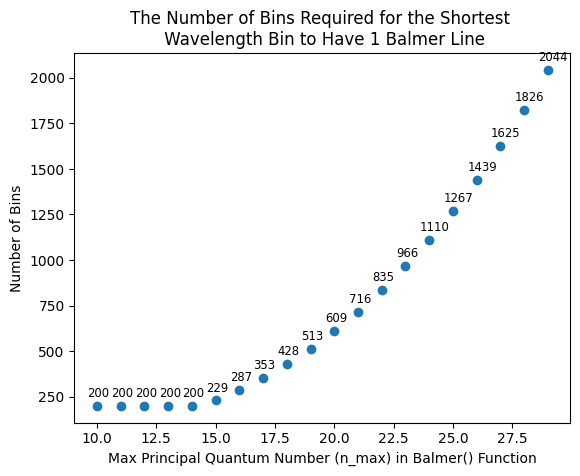

In [16]:
# your extraction and plotting commands go here
fig, [ax1, ax2] = plt.subplots(2,1)

y10=[]
y11=[]
y12=[]
y20=[]
y21=[]
y22=[]
x=np.arange(10, 30, 1)

for num in x:
  y10.append(np.histogram(balmer_mod(num), 200)[0][0])
  y11.append(np.histogram(balmer_mod(num), 200)[0][1])
  y12.append(np.histogram(balmer_mod(num), 200)[0][2])

ax1.plot(x, y10, label="383.65-385.02 nm Bin")
ax1.plot(x, y11, label="385.02-386.38 nm Bin")
ax1.plot(x, y12, label="386.38-387.74 nm Bin")
ax1.legend()
ax1.set_title("Number of Balmer Lines in the Shortest Three Bins \n Varied by n_max in Balmer() (bin=200)")
ax1.set_xlabel("")
ax1.tick_params(axis='x', which='both',bottom=True,top=False, labelbottom=False)
ax1.set_ylabel("Number of Balmer Lines")

for num in x:
  y20.append(np.histogram(balmer_mod(num), 300)[0][0])
  y21.append(np.histogram(balmer_mod(num), 300)[0][1])
  y22.append(np.histogram(balmer_mod(num), 300)[0][2])

ax2.plot(x, y10, label="383.65-384.56 nm Bin")
ax2.plot(x, y11, label="384.56-385.47 nm Bin")
ax2.plot(x, y12, label="385.47-386.38 nm Bin")
ax2.legend()
ax2.set_title("bin=300")
ax2.set_xlabel("Max Principal Quantum Number (n_max) in Balmer() Function")
ax2.set_ylabel("Number of Balmer Lines")

plt.show()

y=[]

for num in x:
  i = 200
  while True:
    if np.max(np.histogram(balmer_mod(num),i)[0]) == 1:
      y.append(i)
      break
    else:
      i+=1

plt.scatter(x, y)
j=0
for j in range(len(x)):
  plt.text(x[j]-0.4, y[j]+50, y[j],fontsize="small")
plt.title("The Number of Bins Required for the Shortest \n Wavelength Bin to Have 1 Balmer Line")
plt.xlabel("Max Principal Quantum Number (n_max) in Balmer() Function")
plt.ylabel("Number of Bins")
plt.show()

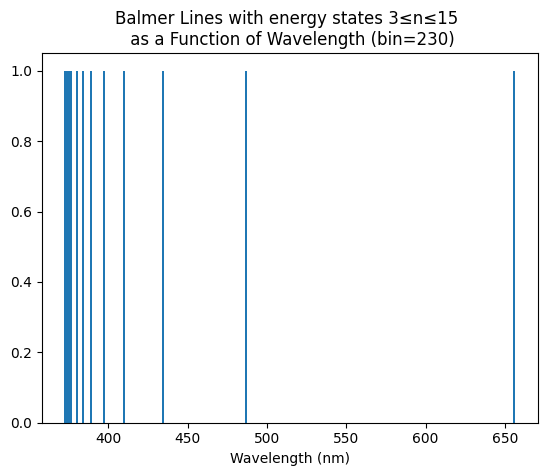

In [17]:
plt.hist(balmer_mod(15), 230)
plt.title("Balmer Lines with energy states 3≤n≤15 \n as a Function of Wavelength (bin=230)")
plt.xlabel("Wavelength (nm)")
plt.show()

*The first graph(s) indicates how the number of lines in each bin increases as I increase the max principal quantum number in Balmer() function. It makes sense that the total number of lines increase as there are more possible combinations of electron transitioins. The figure plots the three shortest wavelength bins, and **the shortest wavelength bin always gain the number of samples in it first**. This also is reasonable as the diifference in energy between states is smaller when n is larger; in other words, as the difference between nth shell and (n+1)th shell is tiny when n is large, (n+1)-2 and n-2, which are the energy that appear as Balmer lines on the spectrum, are close to each other. These Balmer lines have bigger amount of energy transition (as n is farther than, for instance, n=3 or 4), which appear to have short wavelengths. \\
The second plot justfies the choice of n_max and bin numbers. If we don't increase the number of the bins while increasing n_max, the shortest wavelength bin would have multiple lines, making the histogram different from what we want. **The plot describes that if we keep bin=200, we can increase n_max to 14. If we want n_max=15, we must make bin=229.** However, to make n_max=16, we need to increase the bin number by 58, and for n_max=17, we need to increase by 66 additionally (124 total). The amount we need to increase becomes bigger, and increase by 58 to gain one more energy state seems not productive. Therefore, **I picked n_max=15 with bin = 230** (The last plot)*

(4) Using the `balmer` function as a model, create a new function called `lyman` that plots the Lyman series transition wavelengths and make a plot.

In [18]:
#your lyman function goes here
def lyman(n_max=50):

    # Rydberg Constant for Hydrogen in nm^-1
    R = 1./91.17636 # hint: look up the Rydberg wavelength!

    # Array of possible states
    n = np.arange(2,int(n_max),1)

    # calculatng (1/1)^2
    level1 = (1./1.)**2
    # calculatiing (1/n)^2
    leveln = (1./n)**2

    # Balmer's formula: 1/lambda = R * ((1/2)^2 + (1/n)^2)
    invlam = R*(level1 - leveln)
    # 1/(1/lambda) = la,bda
    lam = 1./invlam

    # return lambdas in nm (as a list)
    return(lam)

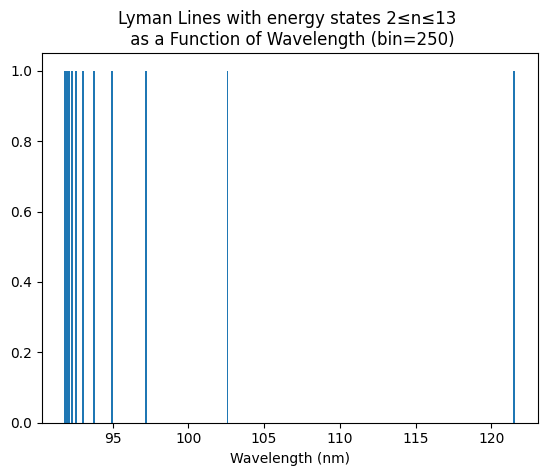

In [19]:
# your extraction and plotting commands go here - make sure you update titles/axes in your plot as needed!
lam = lyman(13)
plt.hist(lam,250)
plt.title("Lyman Lines with energy states 2≤n≤13 \n as a Function of Wavelength (bin=250)")
plt.xlabel('Wavelength (nm)')
plt.show()

(5) Using the `balmer` function as a model, create a new function called `paschen` that plots the Paschen series transition wavelengths and make a plot.

In [20]:
#your paschen function goes here
def paschen(n_max=50):

    # Rydberg Constant for Hydrogen in nm^-1
    R = 1./91.17636 # hint: look up the Rydberg wavelength!

    # Array of possible states
    n = np.arange(4,int(n_max),1)

    # calculatng (1/3)^2
    level3 = (1./3.)**2
    # calculatiing (1/n)^2
    leveln = (1./n)**2

    # Balmer's formula: 1/lambda = R * ((1/2)^2 + (1/n)^2)
    invlam = R*(level3 - leveln)
    # 1/(1/lambda) = la,bda
    lam = 1./invlam

    # return lambdas in nm (as a list)
    return(lam)

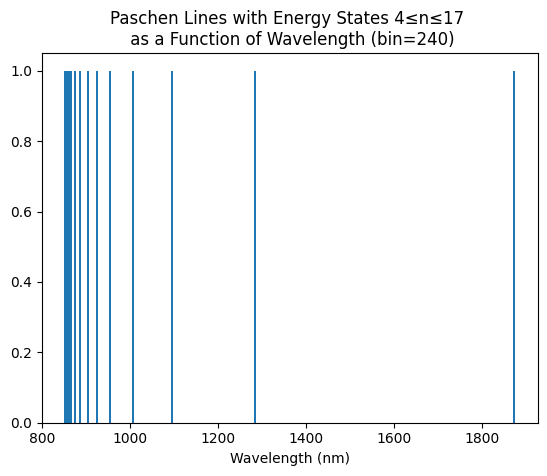

In [21]:
# your extraction and plotting commands go here - make sure you update titles/axes in your plot as needed!lam = paschen()
lam = paschen(17)
# print(lam)
plt.hist(lam,240)
plt.title("Paschen Lines with Energy States 4≤n≤17 \n as a Function of Wavelength (bin=240)")
plt.xlabel('Wavelength (nm)')
plt.show()

(6) Describe the ways in which the three plots are similar to and different from one another. Be quantiative in your comparison by describing the overall wavelength ranges and patterns of spacings. Connect this to the structure of the hydrogen atom and the nature of the transitions that create the three series.  

*They all have similar overall shapes; more lines exist at shorter wavelength, and the lines appear with larger intervals in the longer wavelenth. \\
One difference is that the overall range of wavelengths of Lyman series is the shortest, followed by Balmer, and then Paschen: Lyman is about 90-120 nm, Balmer is 360-660 nm, and Paschen is about from 800 to 1900. It is because Lyman lines indicate the energy from the electron transition from n=1, which has the lowest potential energy. Therefore, Lyman series only appears when electrons absorb high enough energy to move from n=1, resulting in shorter wavelength. On the other hand, Paschen series describes the energy transition from n=3, which is not as energetic as Lyman Series, resulting in longer wavelength. \\
Additionally, Paschen has the widest range of wavelength, while Lyman only has ~30 nm of domain. Since the wavelength is inversely proportional to energy (Planck's Equation), at bigger energy, the difference in energy does not make much difference in wavelength. However, if the energy is lower, the small difference in the energy can result in a big range of wavelength.*

[Bonus] A good challenge for those of you newer to programming would be to modify the `balmer` function you were given to be more generic so that the same function could be used to generate Lyman, Balmer, Paschen, etc. wavelengths.

In [22]:
def Hline (n_base, n_max=50):

    # Rydberg Constant for Hydrogen in nm^-1
    R = 1./91.17636 # hint: look up the Rydberg wavelength!

    # Array of possible states
    n = np.arange(int(n_base)+1,int(n_max),1)

    # calculatng (1/n_base)^2
    levelb = (1./(float(n_base)))**2
    # calculatiing (1/n)^2
    leveln = (1./n)**2

    # Balmer's formula: 1/lambda = R * ((1/2)^2 + (1/n)^2)
    invlam = R*(levelb - leveln)
    # 1/(1/lambda) = la,bda
    lam = 1./invlam

    # return lambdas in nm (as a list)
    return(lam)